# CAMS European Air Quality Forecasts and Analyses

```{hint} 
<a href='https://dust.ltpy.adamplatform.eu/hub/user-redirect/lab/tree/02_model_forecasts/22_CAMS_European_air_quality_forecast_dust_concentration_load_browse.ipynb' target='_blank'>Execute the notebook on the training platform >></a>
```

This notebooks provides an introduction to the <a href='https://ads.atmosphere.copernicus.eu/cdsapp#!/dataset/cams-europe-air-quality-forecasts?tab=overview' target='_blank'>CAMS European Air Quality Forecasts</a> dataset, which provides daily air quality analyses and forecasts over Europe.

CAMS produces specific daily air quality analyses and forecasts for the European domain at significantly higher spatial resolution (0.1 degrees, approx. 10km) than is available from the global analyses and forecasts. The production is based on an ensemble of nine air quality forecasting systems across Europe. A median ensemble is calculated from individual outputs, since ensemble products yield on average better performance than the individual model products. Air quality forecasts are produced once a day for the next four days. Both the analysis and the forecast are available at hourly time steps at seven height levels.

The notebook examines the **Saharan Dust event** which occured over parts of Europe in the first half of April 2024.


```{admonition} Basic facts
**Spatial resolution**: `0.1° x 0.1°` <br>
**Spatial coverage**: `Europe` <br>
**Temporal resolution**:  `1-hourly up to leadtime hour 120` <br>
**Temporal coverage**: `three-year rolling archive` <br>
**Data format**: `GRIB` or `zipped NetCDF`
```

```{admonition} How to access the data
CAMS European air quality forecasts are available for download via the <a href='https://ads.atmosphere.copernicus.eu/' target='_blank'>Copernicus Atmosphere Data Store (ADS)</a>. You will need to create an ADS account <a href='https://ads.atmosphere.copernicus.eu/user/register' target='_blank'>here</a>.

Data from the ADS can be downloaded in two ways:
* `manually` via the <a href='https://ads.atmosphere.copernicus.eu/cdsapp#!/dataset/cams-europe-air-quality-forecasts?tab=overview' target='_blank'>ADS web interface</a>
* `programmatically` with a Python package called cdsapi (<a href='https://ads.atmosphere.copernicus.eu/api-how-to' target='_blank'>more information</a>)
```

<hr>

**Load required libraries**

In [1]:
import xarray as xr
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.cm import get_cmap
from matplotlib import animation
from matplotlib.axes import Axes

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

from IPython.display import HTML

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

**Load helper functions**

In [2]:
%run ../functions.ipynb

<hr>

## *Optional: Retrieve CAMS European air quality forecasts programmatically*

The `CDS Application Program Interface (CDS API)` is a Python library which allows you to access data from the ADS `programmatically`. In order to use the CDS API, follow the steps below:

* <a href='https://ads.atmosphere.copernicus.eu/user/register?destination=//' target='_blank'>Self-register</a> at the ADS registration page (if you do not have an account yet)
* <a href='https://ads.atmosphere.copernicus.eu/user/login' target='_blank'>Login</a> to the ADS portal and go to the <a href='https://ads.atmosphere.copernicus.eu/api-how-to' target='_blank'>api-how-to-page</a>.
* Copy the CDS API key displayed in the black terminal window and replace the `######` of the `KEY` variable below with your individual CDS API key

**Note:** You find your CDS API key displayed in the black terminal box under the section `Install the CDS API key`. If you do not see a URL or key appear in the black terminal box, please refresh your browser tab. 

In [4]:
URL='https://ads.atmosphere.copernicus.eu/api/v2'
KEY='########################'

The next step is then to request the data with a so called `API request`. Via the <a href='https://ads.atmosphere.copernicus.eu/cdsapp#!/dataset/cams-europe-air-quality-forecasts?tab=form' target='_blank'>ADS web interface</a>, you can select the data and at the end of the web interface, you can open the ADS request via `Show API request`. Copy the request displayed there in the cell below. Once you execute the cell, the download of the data starts automatically.

In the web interface we specified the following characteristics:
* **Variable**: `Dust`
* **Date**: `2024-04-07` to `2024-04-07`
* **time**: `00:00` *(Start of the model run)*
* **Lead time hour**: `every 3 hours up to forecast hour 90`
* **Level**: `0` *(metres above sea level)*
* **Format**: `netcdf_zip`

In [ ]:
import cdsapi

c = cdsapi.Client(url=URL, key=KEY)

c.retrieve(
    'cams-europe-air-quality-forecasts',
    {
        'model': 'ensemble',
        'date': '2024-04-07/2024-04-07',
        'format': 'netcdf',
        'variable': 'dust',
        'type': 'forecast',
        'time': '00:00',
        'leadtime_hour': [
            '0', '12', '15',
            '18', '21', '24',
            '27', '3', '30',
            '33', '36', '39',
            '42', '45', '48',
            '51', '54', '57',
            '6', '60', '63',
            '66', '69', '72',
            '75', '78', '81',
            '84', '87', '9',
            '90',
        ],
        'level': '0',
    },
    '../20240407_dust_concentration.nc')

## Load and browse CAMS European Air Quality forecast data

CAMS European air quality forecasts can be downloaded in either `GRIB` or `NetCDF`. The data for the present example has been downloaded in the `netCDF` format.
You can use xarray's function `xr.open_dataset()` to open the NetCDF file as `xarray.Dataset`. 

In [3]:
file = xr.open_dataset('../eodata/3_model/cams/european_forecast/20240407_dust_concentration.nc')
file


<xarray.Dataset> Size: 36MB
Dimensions:    (longitude: 700, latitude: 420, level: 1, time: 31)
Coordinates:
  * longitude  (longitude) float32 3kB 335.0 335.1 335.2 ... 44.75 44.85 44.95
  * latitude   (latitude) float32 2kB 71.95 71.85 71.75 ... 30.25 30.15 30.05
  * level      (level) float32 4B 0.0
  * time       (time) timedelta64[ns] 248B 0 days 00:00:00 ... 3 days 18:00:00
Data variables:
    dust       (time, level, latitude, longitude) float32 36MB ...
Attributes:
    title:        Dust Air Pollutant FORECAST at the Surface
    institution:  Data produced by Meteo France
    source:       Data from ENSEMBLE model
    history:      Model ENSEMBLE FORECAST
    FORECAST:     Europe, 20240407+[0H_90H]
    summary:      ENSEMBLE model hourly FORECAST of Dust concentration at the...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)

The data above has four dimensions (`latitude`, `longitude`, `level` and `time`) and one data variable:
* `dust`: Dust Air Pollutant

Let us inspect the coordinates of the file more in detail.

Below, you see that the data set consists of 31 time steps, starting on 7 April 2024 00 UTC and ranging up to 6 days ahead. However, the format of the time coordinates is in nanoseconds.

Let us convert the time information into a human-readable time format.

In [4]:
file.time

<xarray.DataArray 'time' (time: 31)> Size: 248B
array([              0,  10800000000000,  21600000000000,  32400000000000,
        43200000000000,  54000000000000,  64800000000000,  75600000000000,
        86400000000000,  97200000000000, 108000000000000, 118800000000000,
       129600000000000, 140400000000000, 151200000000000, 162000000000000,
       172800000000000, 183600000000000, 194400000000000, 205200000000000,
       216000000000000, 226800000000000, 237600000000000, 248400000000000,
       259200000000000, 270000000000000, 280800000000000, 291600000000000,
       302400000000000, 313200000000000, 324000000000000],
      dtype='timedelta64[ns]')
Coordinates:
  * time     (time) timedelta64[ns] 248B 0 days 00:00:00 ... 3 days 18:00:00
Attributes:
    long_name:  FORECAST time from 20240407

First, from the `long_name` information of the time dimension, we can retrieve the initial timestamp. With the function `strptime()` from Python's `datetime` library, we can convert it into a `datetime.datetime` object.

In [5]:
timestamp = file.time.long_name[19:27]

timestamp_init=datetime.strptime(timestamp,'%Y%m%d' )
timestamp_init

datetime.datetime(2024, 4, 7, 0, 0)

In a next step, we then build a `DateTimeIndex` object with the help of Panda's `date_range()` function, making use of the length of the time dimension.

The result is a `DateTimeIndex` object, which can be used to newly assign the time coordinate information.

In [6]:
time_coords = pd.date_range(timestamp_init, periods=len(file.time), freq='3h').strftime("%Y-%m-%d %H:%M:%S").astype('datetime64[ns]')
time_coords

DatetimeIndex(['2024-04-07 00:00:00', '2024-04-07 03:00:00',
               '2024-04-07 06:00:00', '2024-04-07 09:00:00',
               '2024-04-07 12:00:00', '2024-04-07 15:00:00',
               '2024-04-07 18:00:00', '2024-04-07 21:00:00',
               '2024-04-08 00:00:00', '2024-04-08 03:00:00',
               '2024-04-08 06:00:00', '2024-04-08 09:00:00',
               '2024-04-08 12:00:00', '2024-04-08 15:00:00',
               '2024-04-08 18:00:00', '2024-04-08 21:00:00',
               '2024-04-09 00:00:00', '2024-04-09 03:00:00',
               '2024-04-09 06:00:00', '2024-04-09 09:00:00',
               '2024-04-09 12:00:00', '2024-04-09 15:00:00',
               '2024-04-09 18:00:00', '2024-04-09 21:00:00',
               '2024-04-10 00:00:00', '2024-04-10 03:00:00',
               '2024-04-10 06:00:00', '2024-04-10 09:00:00',
               '2024-04-10 12:00:00', '2024-04-10 15:00:00',
               '2024-04-10 18:00:00'],
              dtype='datetime64[ns]', freq=Non

And the last step is to assign the converted time information to the DataArray `dust`, with the function `assign_coords()`.

In [7]:
dust = file.assign_coords(time=time_coords)
dust

<xarray.Dataset> Size: 36MB
Dimensions:    (longitude: 700, latitude: 420, level: 1, time: 31)
Coordinates:
  * longitude  (longitude) float32 3kB 335.0 335.1 335.2 ... 44.75 44.85 44.95
  * latitude   (latitude) float32 2kB 71.95 71.85 71.75 ... 30.25 30.15 30.05
  * level      (level) float32 4B 0.0
  * time       (time) datetime64[ns] 248B 2024-04-07 ... 2024-04-10T18:00:00
Data variables:
    dust       (time, level, latitude, longitude) float32 36MB ...
Attributes:
    title:        Dust Air Pollutant FORECAST at the Surface
    institution:  Data produced by Meteo France
    source:       Data from ENSEMBLE model
    history:      Model ENSEMBLE FORECAST
    FORECAST:     Europe, 20240407+[0H_90H]
    summary:      ENSEMBLE model hourly FORECAST of Dust concentration at the...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)

The latitude values have a 0.1 degrees resolution and have a global N-S coverage.

In [8]:
file.latitude

<xarray.DataArray 'latitude' (latitude: 420)> Size: 2kB
array([71.95, 71.85, 71.75, ..., 30.25, 30.15, 30.05], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 2kB 71.95 71.85 71.75 ... 30.25 30.15 30.05
Attributes:
    long_name:  latitude
    units:      degrees_north

The longitude values have a 0.1 degrees resolution as well, but are on a [0,360] grid instead of a [-180,180] grid. 

In [9]:
file.longitude

<xarray.DataArray 'longitude' (longitude: 700)> Size: 3kB
array([335.05, 335.15, 335.25, ...,  44.75,  44.85,  44.95], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 3kB 335.0 335.1 335.2 ... 44.75 44.85 44.95
Attributes:
    long_name:  longitude
    units:      degrees_east

You can assign new values to coordinates in an `xarray.Dataset`. You can do this with the `assign_coords()` function, which you can apply onto a `xarray.Dataset`. With the code below, you shift your longitude grid from [0,360] to [-180,180]. At the end, you sort the longitude values in an ascending order.

In [10]:
file_assigned = dust.assign_coords(longitude=(((dust.longitude + 180) % 360) - 180)).sortby('longitude')
file_assigned

<xarray.Dataset> Size: 36MB
Dimensions:    (latitude: 420, level: 1, time: 31, longitude: 700)
Coordinates:
  * latitude   (latitude) float32 2kB 71.95 71.85 71.75 ... 30.25 30.15 30.05
  * level      (level) float32 4B 0.0
  * time       (time) datetime64[ns] 248B 2024-04-07 ... 2024-04-10T18:00:00
  * longitude  (longitude) float32 3kB -24.95 -24.85 -24.75 ... 44.85 44.95
Data variables:
    dust       (time, level, latitude, longitude) float32 36MB ...
Attributes:
    title:        Dust Air Pollutant FORECAST at the Surface
    institution:  Data produced by Meteo France
    source:       Data from ENSEMBLE model
    history:      Model ENSEMBLE FORECAST
    FORECAST:     Europe, 20240407+[0H_90H]
    summary:      ENSEMBLE model hourly FORECAST of Dust concentration at the...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)

A quick check of the longitude coordinates of the new `xarray.Dataset` shows you that the longitude values range now between [-180, 180].

In [11]:
file_assigned.longitude

<xarray.DataArray 'longitude' (longitude: 700)> Size: 3kB
array([-24.950012, -24.849976, -24.75    , ...,  44.75    ,  44.850006,
        44.949997], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 3kB -24.95 -24.85 -24.75 ... 44.85 44.95

## Retrieve the data variable dust as data array

Let us store the data variable `dust concentration` as `xarray.DataArray` with the name `dust`.

In [12]:
dust = file_assigned.dust
dust

<xarray.DataArray 'dust' (time: 31, level: 1, latitude: 420, longitude: 700)> Size: 36MB
[9114000 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 2kB 71.95 71.85 71.75 ... 30.25 30.15 30.05
  * level      (level) float32 4B 0.0
  * time       (time) datetime64[ns] 248B 2024-04-07 ... 2024-04-10T18:00:00
  * longitude  (longitude) float32 3kB -24.95 -24.85 -24.75 ... 44.85 44.95
Attributes:
    species:        Dust
    units:          µg/m3
    value:          hourly values
    standard_name:  mass_concentration_of_dust_in_air

Above, you see that the variable `dust` has four attributes, `species`, `units`, `value` and `standard_name`. Let us define variables for `unit` and `standard_name` attributes. The variables can be used for visualizing the data.

In [13]:
long_name = dust.standard_name
units = dust.units

Let us do the same for the coordinates `longitude` and `latitude`.

In [14]:
latitude = dust.latitude
longitude = dust.longitude

## Visualize the *dust concentration* in Europe

The next step is to visualize the dataset. You can use the function [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh), which makes use of matploblib's function `pcolormesh` and the [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) library.

With `?visualize_pcolormesh` you can open the function's docstring to see what keyword arguments are needed to prepare your plot.

In [12]:
?visualize_pcolormesh

You can make use of the variables we have defined above:
- `units`
- `long_name`
- `latitude`
- `longitude`

Additionally, you can specify the color scale and minimum and maxium data values.

(<Figure size 2000x1000 with 2 Axes>,
 <GeoAxes: title={'center': 'mass_concentration_of_dust_in_air - 2024-04-09T15:00'}>)

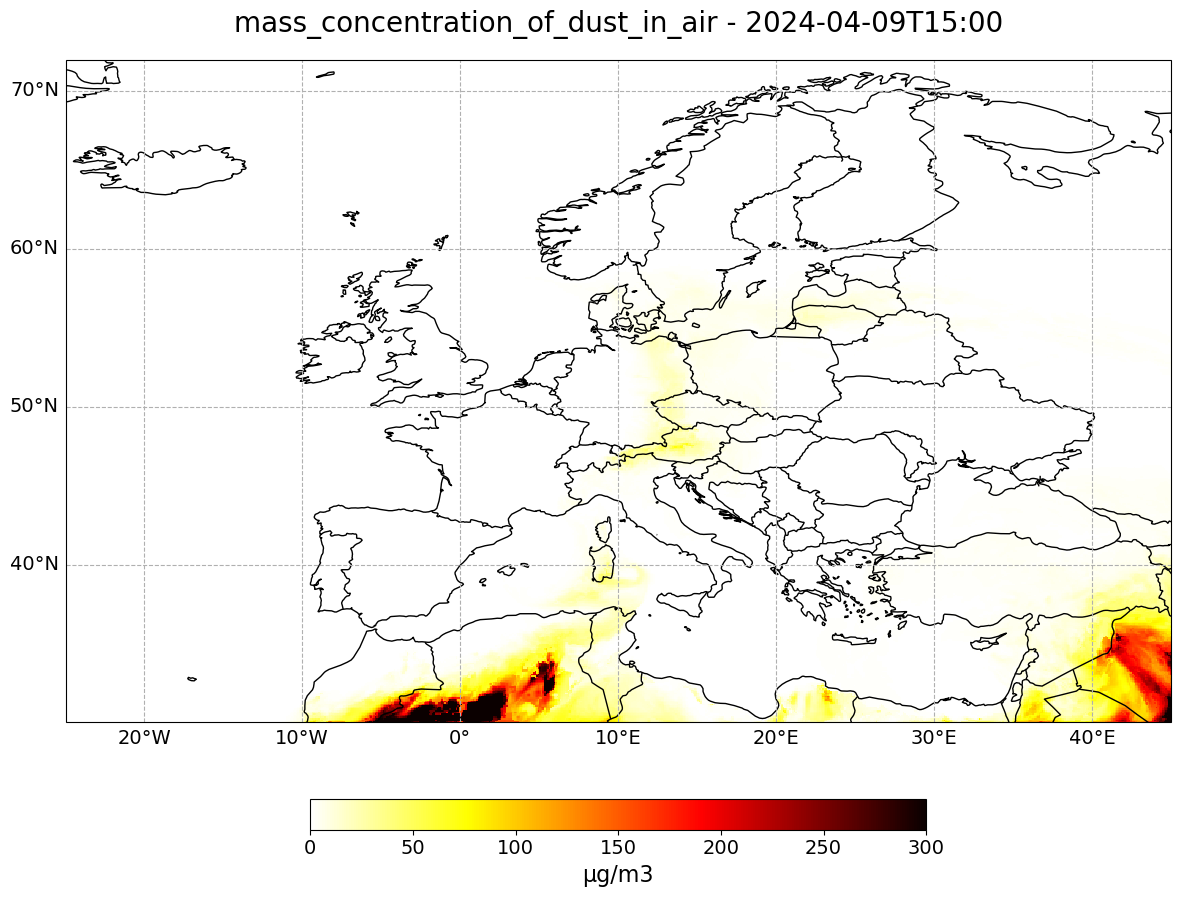

In [16]:
time_index = 21
visualize_pcolormesh(data_array=dust[time_index,0,:,:],
                     longitude=longitude,
                     latitude=latitude,
                     projection=ccrs.PlateCarree(),
                     color_scale='hot_r',
                     unit=units,
                     long_name=long_name + ' - ' + str(dust[time_index,0,:,:].time.data)[0:16],
                     vmin=0, 
                     vmax=300,
                     lonmin=longitude.min().data,
                     lonmax=longitude.max().data,
                     latmin=latitude.min().data,
                     latmax=latitude.max().data,
                     set_global=False)

## Animate dust concentration forecasts over Europe

In the last step, you can animate the `dust concentration` in order to see how the trace gas develops over a period of 4 days, from 7th to 10th of April 2024.

You can do animations with matplotlib's function `animation`. Jupyter's function `HTML` can then be used to display HTML and video content.

The animation function consists of 4 parts:
- **Setting the initial state:**<br>
 Here, you define the general plot your animation shall use to initialise the animation. You can also define the number of frames (time steps) your animation shall have.
 
 
- **Functions to animate:**<br>
 An animation consists of three functions: `draw()`, `init()` and `animate()`. `draw()` is the function where individual frames are passed on and the figure is returned as image. In this example, the function redraws the plot for each time step. `init()` returns the figure you defined for the initial state. `animate()` returns the `draw()` function and animates the function over the given number of frames (time steps).
 
 
- **Create a `animate.FuncAnimation` object:** <br>
 The functions defined before are now combined to build an `animate.FuncAnimation` object.
 
 
- **Play the animation as video:**<br>
 As a final step, you can integrate the animation into the notebook with the `HTML` class. You take the generate animation object and convert it to a HTML5 video with the `to_html5_video` function

In [17]:
# Setting the initial state:
# 1. Define figure for initial plot
fig, ax = visualize_pcolormesh(data_array=dust[0,0,:,:],
                               longitude=dust.longitude, 
                               latitude=dust.latitude,
                               projection=ccrs.PlateCarree(), 
                               color_scale='hot_r', 
                               unit=units,
                               long_name=long_name + ' - '+ str(dust.time[0].data)[0:16],
                               vmin=0,
                               vmax=250, 
                               lonmin=longitude.min().data, 
                               lonmax=longitude.max().data, 
                               latmin=latitude.min().data, 
                               latmax=latitude.max().data,
                               set_global=False)

frames = 24

def draw(i):
    img = plt.pcolormesh(dust.longitude, 
                         dust.latitude, 
                         dust[i,0,:,:], 
                         cmap='hot_r', 
                         transform=ccrs.PlateCarree(),
                         vmin=0,
                         vmax=250,
                         shading='auto')
    
    ax.set_title(long_name + ' - '+ str(dust.time[i].data)[0:16], fontsize=20, pad=20.0)
    return img

def init():
    return fig

def animate(i):
    return draw(i)

ani = animation.FuncAnimation(fig, animate, frames, interval=800, blit=False,
                              init_func=init, repeat=True)

HTML(ani.to_html5_video())
plt.close(fig)

**Play the animation video as HTML5 video**

In [18]:
HTML(ani.to_html5_video())